## Basic Operation On images part-1

1. Access pixel values and modify them
2. Access image properties
3. Set a Region of Interest (ROI)
4. Split and merge image channels

In [1]:
import cv2

In [3]:
import numpy as np

In [15]:
img = cv2.imread('D:/image_examples/anitaphoto.jpg') 
cv2.imshow('Original Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 1. Access pixel values and modify them

In [17]:
px = img[100,100]   ## this is pixel of 100th row and 100th column
print( px )       

[106 124 165]


OpenCV stores the color image as BGR color image,so the first value in the list is the value of the blue channel of this particular pixel, and the rest are values for green and red channels.

In [19]:
# accessing only blue pixel      
#blue = img[100,100,0]  
print("pixel value blue channel at [100,100]:", img[100,100][0])   #we access the pixel value at a point in the input image.
#print( blue )

pixel value blue channel at [100,100]: 106


In [21]:
# accessing only red pixel
red = img[100,100,2]
print( red )

165


To modify the values, we just need to access the pixel and then overwrite it with a value 

To access a single pixel use indexing and to modify a single pixel value use assignment to indexing.

In [27]:
img[100,100] = [150,0,0]
print( img[100,100] )
cv2.imshow('Modified Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[150   0   0]


To access a sequence of pixels use slicing and to modify these pixel values use assignment to slicing. 
to modify the pixel values at [100:150,150:200] to red color

In [29]:
img[100:150,150:200] = (0, 0, 255)    #to modify the pixel value at [100,150] to red color
cv2.imshow('Modified Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

For accessing individual pixel values, the Numpy array methods, array.item() and array.itemset() are considered better as  they always return a scalar.

In [31]:
# accessing GREEN value
img.item(10,10,1)
# modifying RED value
img.itemset((10,10,1),100)
img.item(10,10,1)


100

### 2. Access Image properties

to know the size(total number of pixels in the image), number of rows, columns, and channels.

In [33]:
print( img.shape )  ## shape prints the tuple (height,weight,channels) 
print( img.size )


(242, 180, 3)
130680


In [35]:

input = cv2.imread('D:/image_examples/anitaphoto.jpg',cv2.IMREAD_GRAYSCALE)


In [37]:
#an image is grayscale, the tuple returned contains only the number of rows and columns.
print(input.shape)
print(img.size)

(242, 180)
130680


In [39]:
print( img.dtype )   #knowing the image datatype is very important while debugging.

uint8


### 3. Set a Region of Interest (ROI)

### 4. Splitting and Merging Image Channels

In [43]:
input1 = cv2.imread('D:/image_examples/elephant.jpg')
b,g,r = cv2.split(input1)    #cv2.split() is used to split coloured/multi-channel image into separate single-channel images. 


In [45]:
cv2.imshow('Anita Photo', input1)
cv2.waitKey()            
cv2.destroyAllWindows()  

In [47]:
cv2.imshow("Model Blue Image", b) 
cv2.waitKey()            
cv2.destroyAllWindows()  

In [49]:
cv2.imshow("Model Green Image", g) 
cv2.waitKey()            
cv2.destroyAllWindows()  

In [51]:
cv2.imshow("Model Red Image", r) 
cv2.waitKey()            
cv2.destroyAllWindows()  

cv2.merge() is used to merge several single-channel images into a colored/multi-channel image.

In [53]:
# into a coloured/multi-channeled image 
image_merge = cv2.merge([r, g, b]) 
  
# Displaying Merged RGB image 
cv2.imshow("RGB_Image", image_merge) 
  
# Waits for user to press any key 
cv2.waitKey(0) 

-1

## Basic Operation On images part-2

1. resize an image
2. crop an image Section
3. Image Rotation
4. copy a Region to another in an image

## Image Resizing 

. Resize Function Syntax: 

. resize(src,size,fx,fy,interpolation)  
- src: It is the required input image
- size: desired size for the output image after resizing (required)
- fx: Scale factor along the horizontal axis.
- fy: Scale factor along the vertical axis.
- interpolation: It gives us the option of different methods of resizing the image.      rhood

-Interpolation(optional) – This flag uses following methods:
  
          -INTER_NEAREST – a nearest-neighbor interpolation
  
          -INTER_LINEAR – a bilinear interpolation (used by default)
  
          -INTER_AREA – resampling using pixel area relation.
  
          -INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood
  
          -INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood

In [1]:
import cv2
import numpy as np

In [3]:
image = cv2.imread('D:/image_examples/dog.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey()
cv2.destroyAllWindows()


In [5]:
print(image.shape)

(640, 427, 3)


***Resize by specifying Width and Height***

In [7]:
# let's downscale the image using new  width and height
down_width = 300
down_height = 200
down_points = (down_width, down_height)
resized_down_img= cv2.resize(image, down_points, interpolation= cv2.INTER_CUBIC)
 
# Display images
cv2.imshow('Resized Down image by defining height and width', resized_down_img)
cv2.waitKey()
 
#press any key to close the windows
cv2.destroyAllWindows()

In [25]:

image = cv2.imread('D:/image_examples/dog.jpg')
cv2.imshow('Original Image', image)
# let's upscale the image using new  width and height
up_width = 640
up_height = 427
up_points = (up_width, up_height)
resized_up_img = cv2.resize(image, up_points,0,0, interpolation= cv2.INTER_CUBIC)
 
# Display images
cv2.imshow('Resized Up image by defining height and width', resized_up_img)
cv2.waitKey()
 
#press any key to close the windows
cv2.destroyAllWindows()

***Resizing with scaling factor***

In [9]:
# Scaling Down the image 0.6 times specifying a single scale factor.
scale_down = 0.6
scaled_f_down = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
# Display images and press any key to check next image
cv2.imshow('Resized Down by defining scaling factor', scaled_f_down)
cv2.waitKey()

-1

In [15]:
# Scaling Up the image 1.2 times by specifying both scaling factors
scale_up_x = 1.2
scale_up_y = 1.2
#scaled_f_up = cv2.resize(image, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv2.INTER_LINEAR)
scaled_f_up = cv2.resize(image, None, fx=1.2, fy=1.2, interpolation= cv2.INTER_LINEAR)
cv2.imshow('Resized Up image by defining scaling factor', scaled_f_up)
cv2.waitKey()

-1

***Resizing With Different Interpolation Methods***

In [17]:
# Scaling Down the image 0.6 times using different Interpolation Method
res_inter_nearest = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_NEAREST)
cv2.imshow('Image with inter nearest interpolation', res_inter_nearest)
cv2.waitKey()

-1

In [19]:
res_inter_linear = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
cv2.imshow('Image with inter linear interpolation', res_inter_linear)
cv2.waitKey()

-1

In [21]:
res_inter_area = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_AREA)
cv2.imshow('Image with inter area interpolation', res_inter_area)
cv2.waitKey()

-1

***Concatenate Images***

In [23]:
# Concatenate images in horizontal axis for comparison
vertical= np.concatenate((res_inter_nearest, res_inter_linear, res_inter_area), axis = 0)
# Display the image Press any key to continue
cv2.imshow('Inter Nearest :: Inter Linear :: Inter Area', vertical)
cv2.imwrite('output.jpg', vertical)
cv2.waitKey()

-1

In [25]:
pwd

'C:\\Users\\HP'

## Cropping an Image

In [27]:
import cv2
import numpy as np
 
input1 = cv2.imread('D:/image_examples/dog.jpg')
print(input1.shape) # Print image shape
cv2.imshow("original", input1)
cv2.waitKey(0)
cv2.destroyAllWindows() 


(640, 427, 3)


In [29]:
# Cropping an image
cropped_image = input1[80:280, 150:330]
 
# Display cropped image
cv2.imshow("cropped", cropped_image)
 
# Save the cropped image
cv2.imwrite("Cropped Image.jpg", cropped_image)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image Rotation


In [31]:
image = cv2.rotate(input1, cv2.ROTATE_90_COUNTERCLOCKWISE) 
cv2.imshow("Rotated",image)
cv2.waitKey()
cv2.destroyAllWindows()

## copy a Region to another in an image

In [33]:
input1 = cv2.imread('D:/image_examples/messi5.jpg')   
# Define the region to copy (top left corner and bottom right corner)
start_row, start_col = 260, 270
end_row, end_col = 310, 350

# Copy the region
region = input1[start_row:end_row, start_col:end_col]

# Paste the region to a new location
input1[10:60, 30:110] = region

# Save and display the image
#cv2.imwrite('output.jpg', input1)
cv2.imshow('Updated Image', input1)
cv2.waitKey(0)
cv2.destroyAllWindows()

## create new images

In [53]:
blank_img = np.zeros(shape=(512,512,3), dtype=np.int16)

In [55]:
blank_img.shape

(512, 512, 3)

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

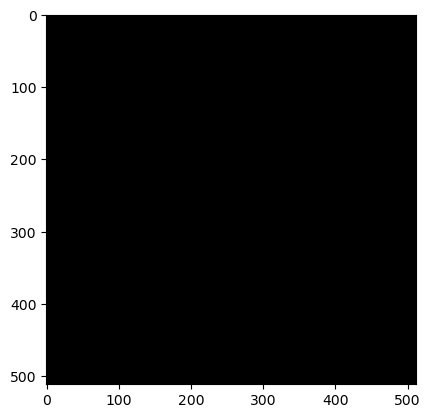

In [58]:
plt.imshow(blank_img)

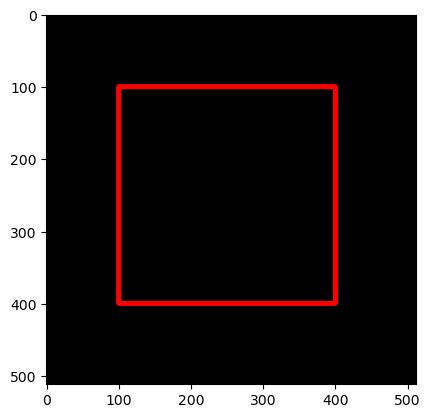

In [61]:
cv2.rectangle(blank_img, pt1=(100,100), pt2=(400,400), color=(255,0,0), thickness=5);
plt.imshow(blank_img)

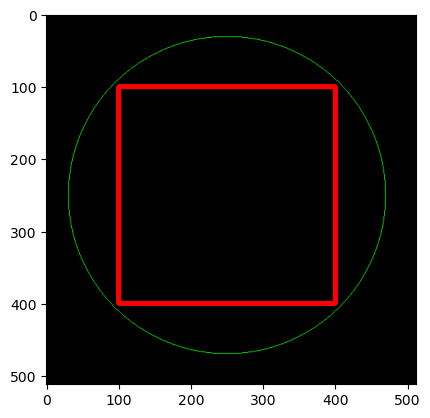

In [63]:
cv2.circle(blank_img, center=(250,250), radius=220, color=(0,255,0), thickness=1);
plt.imshow(blank_img)

In [65]:
cv2.imwrite('sample.jpg', blank_img)

True

## Basic Mathematical Operations

### 1. Addition of Images

In [ ]:
cv2.add() or the straightforward numpy operation addition = image1 + image2 
can be used to combine two images. Both images should be of the same depth and type, 
otherwise, the second image can simply be a scalar number.
But, adding the pixels is not optimal. As a result, we employ the cv2.addweighted() function.

In [55]:
img1 = cv2.imread('D:/image_examples/milky-way-5295160_640.jpg') 
img2=cv2.imread('D:/image_examples/sun-1837376_640.png')
img1 = cv2.resize(img1, (512, 512))
img2 = cv2.resize(img2, (512 ,512))

added_image = cv2.addWeighted(img1, 0.5,img2, 0.5, 0)
cv2.imshow('original first image', img1)
cv2.imshow('original second image', img2)
cv2.imshow('Added Image', added_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2. Blending of Images

In [ ]:
This is likewise image addition, but the images are given varied weights to create the illusion of blending or transparency. 
The first image weights 0.8, whereas the second image has a weight of 0.2

In [4]:
import cv2
import numpy as np

In [6]:
img1 = cv2.imread('D:/image_examples/milky-way-5295160_640.jpg') 
img2=cv2.imread('D:/image_examples/sun-1837376_640.png')
img1 = cv2.resize(img1, (512, 512))
img2 = cv2.resize(img2, (512 ,512))

blended_image = cv2.addWeighted(img1, 0.8,img2, 0.2, 0)
cv2.imshow('original first image', img1)
cv2.imshow('original second image', img2)
cv2.imshow('Blended Image', blended_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 3. subtraction of images 

In [ ]:
With cv2.subtract, we may subtract the pixel values from two images and merge them . 
The images must be the same size and depth. 

In [59]:
img1 = cv2.imread('D:/image_examples/milky-way-5295160_640.jpg') 
img2=cv2.imread('D:/image_examples/sun-1837376_640.png')
img1 = cv2.resize(img1, (512, 512))
img2 = cv2.resize(img2, (512 ,512))

substract_image = cv2.subtract(img1,img2)
cv2.imshow('original first image', img1)
cv2.imshow('original second image', img2)
cv2.imshow('Blended Image', substract_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 4. Multiplication of Images

In [61]:
img1 = cv2.imread('D:/image_examples/milky-way-5295160_640.jpg') 
img1 = cv2.resize(img1, (300,300))
scaling_factor = 0.5
scaled_image= cv2.multiply(img1, np.array([scaling_factor])) 
cv2.imshow('Input image', img1)
cv2.imshow('Scaled image', scaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 5. Division of Images

In [67]:
img1 = cv2.imread('D:/image_examples/sky-501350_1280.jpg') 
img1 = cv2.resize(img1, (300,300))
#normalization
normalized_image = cv2.divide(img1, 0)
cv2.imshow('Input image', img1)
cv2.imshow('Normalized image', normalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Annotating Images

In [1]:
import cv2
# Read Images
img = cv2.imread('D:/image_examples/dog.jpg')
# Display Image
cv2.imshow('Original Image',img)
cv2.waitKey(0)
# Print error message if image is null
if img is None:
    print('Could not read image')


In [3]:
img.shape

(640, 427, 3)

### Draw a Line

line(image, start_point, end_point, color, thickness)

In [5]:
# Draw line on image
imageLine = img.copy()
#Draw the image from point A to B
pointA = (80,80)
pointB = (300,80)
cv2.line(imageLine, pointA, pointB, (0, 255, 0), thickness=3, lineType=cv2.LINE_AA)
cv2.imshow('Image Line', imageLine)
cv2.waitKey(0)

-1

### Draw a Circle

circle(image, center_coordinates, radius, color, thickness)

In [7]:
# Make a copy of image
imageCircle = img.copy()
# define the center of circle
circle_center = (170,200)
# define the radius of the circle
radius =100
#  Draw a circle using the circle() Function
cv2.circle(imageCircle, circle_center, radius, (0, 0, 255), thickness=3, lineType=cv2.LINE_AA) 
# Display the result
cv2.imshow("Image Circle",imageCircle)
cv2.waitKey(0)

-1

### Draw a Filled Circle

In [9]:
# make a copy of the original image
imageFilledCircle = img.copy()
# define center of the circle 
circle_center = (170,200)
# define the radius of the circle
radius =100
# draw the filled circle on input image 
#to fill this circle with a solid color...Just change the thickness argument to -1
cv2.circle(imageFilledCircle, circle_center, radius, (255, 0, 0), thickness=-1, lineType=cv2.LINE_AA)
# display the output image 
cv2.imshow('Image with Filled Circle',imageFilledCircle)
cv2.waitKey(0)

-1

### Draw a Rectangle

rectangle(image, start_point, end_point, color, thickness)

In [11]:
# make a copy of the original image
imageRectangle = img.copy()
# define the starting and end points of the rectangle
start_point =(90,90)
end_point =(300,300)
# draw the rectangle
cv2.rectangle(imageRectangle, start_point, end_point, (0, 0, 255), thickness= 3, lineType=cv2.LINE_8) 
# display the output
cv2.imshow('imageRectangle', imageRectangle)
cv2.waitKey(0)

-1

## Draw an Ellipse

ellipse(image, centerCoordinates, axesLength, angle, startAngle, endAngle, color, thickness)

In [13]:
# make a copy of the original image
imageEllipse = img.copy()
# define the center point of ellipse
ellipse_center = (190,190)
# define the major and minor axes of the ellipse
axis1 = (100,50)
axis2 = (125,50)
# draw the ellipse
#Horizontal
cv2.ellipse(imageEllipse, ellipse_center, axis1, 0, 0, 360, (255, 0, 0), thickness=3)
#Vertical
cv2.ellipse(imageEllipse, ellipse_center, axis2, 90, 0, 360, (0, 0, 255), thickness=3)
# display the output
cv2.imshow('ellipse Image',imageEllipse)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Adding Text

putText(image, text, org, font, fontScale, color)

the first argument is the input image.
    
The next argument is the actual text string that we want to annotate the image with.

The third argument specifies the starting location for the top left corner of the text string.
    
The next two arguments specify the font style and scale.

In [19]:
# make a copy of the original image
imageText = img.copy()   
#let's write the text you want to put on the image  #cv2.FONT_HERSHEY_COMPLEX
text = 'I am a Happy dog!'
#org: Where you want to put the text  or specifies the starting location for the top left corner of the text string
org = (10,400)
# write the text on the input image
cv2.putText(imageText, text, org, fontFace =4, fontScale = 1.0, color = (150,150,120))
# display the output image with text over it
cv2.imshow("Image Text",imageText)
cv2.waitKey(0)
cv2.destroyAllWindows()
